<a href="https://colab.research.google.com/github/ArrEmm/Machine-Learning-Projects/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from PIL import Image
import os

def convert_images_to_bw(input_path, output_path):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    for emotion in os.listdir(input_path):
        emotion_input_path=os.path.join(input_path,emotion)
        emotion_output_path=os.path.join(output_path,emotion)
        if not os.path.exists(emotion_output_path):
            os.makedirs(emotion_output_path)
        # Loop through each image in the input dataset
        for filename in os.listdir(emotion_input_path):
            image_path = os.path.join(emotion_input_path, filename)

            # Open the image
            with Image.open(image_path) as img:
                # Convert the image to black and white
                bw_img = img.convert('L')

                # Save the black and white image to the output folder
                output_emotion_image_path = os.path.join(output_path, emotion)
                output_image_path = os.path.join(output_emotion_image_path, filename)
                bw_img.save(output_image_path)

# Specify the paths to your input (color) and output (black and white) datasets
input_train_dataset_path = '/content/drive/MyDrive/Dataset/train'
output_train_dataset_path = '/content/drive/MyDrive/BAndWDataset/train'
input_test_dataset_path = '/content/drive/MyDrive/Dataset/test'
output_test_dataset_path = '/content/drive/MyDrive/BAndWDataset/test'

# Call the function to convert images and save them
convert_images_to_bw(input_train_dataset_path, output_train_dataset_path)
convert_images_to_bw(input_test_dataset_path, output_test_dataset_path)

In [7]:
pip install tensorflow

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))  # Assuming 7 emotion classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load and preprocess the dataset using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/BAndWDataset/train',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

# Train the model
model.fit(train_generator, epochs=10)

# Save the trained model
model.save('emotion_detection_model.h5')


Found 28709 images belonging to 7 classes.
Epoch 1/10
898/898 [==============================] - 145s 156ms/step - loss: 1.6773 - accuracy: 0.3290
Epoch 2/10
898/898 [==============================] - 100s 112ms/step - loss: 1.4453 - accuracy: 0.4421
Epoch 3/10
898/898 [==============================] - 99s 111ms/step - loss: 1.3377 - accuracy: 0.4895
Epoch 4/10
898/898 [==============================] - 100s 111ms/step - loss: 1.2713 - accuracy: 0.5172
Epoch 5/10
898/898 [==============================] - 101s 113ms/step - loss: 1.2351 - accuracy: 0.5292
Epoch 6/10
898/898 [==============================] - 102s 113ms/step - loss: 1.1961 - accuracy: 0.5477
Epoch 7/10
898/898 [==============================] - 102s 113ms/step - loss: 1.1704 - accuracy: 0.5561
Epoch 8/10
898/898 [==============================] - 101s 112ms/step - loss: 1.1440 - accuracy: 0.5682
Epoch 9/10
898/898 [==============================] - 102s 113ms/step - loss: 1.1210 - accuracy: 0.5762
Epoch 10/10
898/898 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the trained model
model = models.load_model('emotion_detection_model.h5')

# Load and preprocess the test dataset using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/BAndWDataset/test',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False  # Ensure that the order of predictions matches the order of true labels
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_generator)

# Make predictions on the test set
predictions = model.predict(test_generator)

# Convert predictions and true labels to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Print evaluation results
print("Test Accuracy: {:.2f}%".format(eval_results[1] * 100))

# Calculate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)
print("Classification Report:\n", class_report)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)


Found 7178 images belonging to 7 classes.
225/225 [==============================] - 20s 88ms/step
Test Accuracy: 56.70%
Classification Report:
               precision    recall  f1-score   support

       angry       0.42      0.61      0.49       958
   disgusted       0.78      0.06      0.12       111
     fearful       0.38      0.33      0.35      1024
       happy       0.83      0.77      0.80      1774
     neutral       0.53      0.54      0.54      1233
         sad       0.46      0.41      0.44      1247
   surprised       0.69      0.70      0.70       831

    accuracy                           0.57      7178
   macro avg       0.58      0.49      0.49      7178
weighted avg       0.58      0.57      0.57      7178

Confusion Matrix:
 [[ 583    0  103   33  108  110   21]
 [  71    7   11    2    8   10    2]
 [ 212    0  341   49  109  194  119]
 [ 114    0   66 1370  103   74   47]
 [ 145    1  107   82  669  188   41]
 [ 220    0  172   74  235  517   29]
 [  57    1

In [11]:
import cv2

In [12]:
import matplotlib.pyplot as plt

In [13]:
img1= cv2.imread('/content/im7.png')
print(img1)


[[[234 234 234]
  [233 233 233]
  [228 228 228]
  ...
  [225 225 225]
  [229 229 229]
  [224 224 224]]

 [[229 229 229]
  [230 230 230]
  [232 232 232]
  ...
  [224 224 224]
  [221 221 221]
  [218 218 218]]

 [[232 232 232]
  [228 228 228]
  [235 235 235]
  ...
  [226 226 226]
  [226 226 226]
  [226 226 226]]

 ...

 [[215 215 215]
  [181 181 181]
  [149 149 149]
  ...
  [108 108 108]
  [159 159 159]
  [169 169 169]]

 [[166 166 166]
  [140 140 140]
  [123 123 123]
  ...
  [104 104 104]
  [164 164 164]
  [169 169 169]]

 [[142 142 142]
  [123 123 123]
  [118 118 118]
  ...
  [ 95  95  95]
  [164 164 164]
  [169 169 169]]]


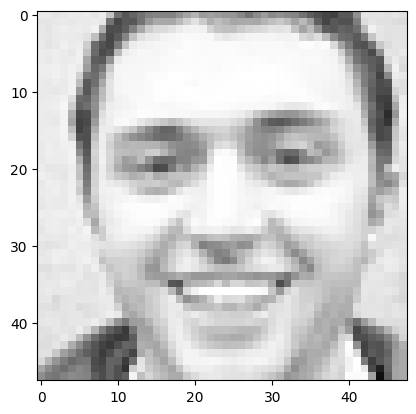

In [14]:
plt.imshow(img1[:,:,::-1])
plt.show()

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = models.load_model('emotion_detection_model.h5')

img_path = '/content/im7.png'  # Replace with the path to your preprocessed grayscale image
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values

# Make predictions on the single image
predictions = model.predict(img_array)

# Convert predictions to class label
predicted_label = np.argmax(predictions[0])

# Get the emotion class based on the predicted label
emotion_classes = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
predicted_emotion = emotion_classes[predicted_label]

# Print the predicted emotion
print("Predicted Emotion: {}".format(predicted_emotion))

1/1 [==============================] - 1s 547ms/step
Predicted Emotion: Happy
